In [149]:
import pandas as pd
import seaborn as sns

In [150]:
df = pd.read_csv("Hotel Reservations (1).csv")

In [151]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [152]:
df.shape

(36275, 19)

In [153]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [154]:
df.isna().sum().sum()

np.int64(0)

In [155]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [157]:
df["Booking_ID"].nunique()

36275

In [158]:
import plotly.express as px
data = df.groupby('room_type_reserved')['Booking_ID'].nunique().reset_index()

fig = px.pie(data, values='Booking_ID', names='room_type_reserved')

fig.show()


In [159]:
df["Total_Days"] = df["no_of_weekend_nights"] + df["no_of_week_nights"]

In [160]:
df.groupby(['room_type_reserved'])['no_of_weekend_nights'].sum()


room_type_reserved
Room_Type 1    21937
Room_Type 2      643
Room_Type 3        4
Room_Type 4     5654
Room_Type 5      201
Room_Type 6      853
Room_Type 7      117
Name: no_of_weekend_nights, dtype: int64

In [161]:
df.groupby(['room_type_reserved'])['no_of_week_nights'].sum()

room_type_reserved
Room_Type 1    59780
Room_Type 2     1603
Room_Type 3       14
Room_Type 4    15391
Room_Type 5      582
Room_Type 6     2251
Room_Type 7      340
Name: no_of_week_nights, dtype: int64

In [162]:
df.groupby(['room_type_reserved'])['Total_Days'].sum()

room_type_reserved
Room_Type 1    81717
Room_Type 2     2246
Room_Type 3       18
Room_Type 4    21045
Room_Type 5      783
Room_Type 6     3104
Room_Type 7      457
Name: Total_Days, dtype: int64

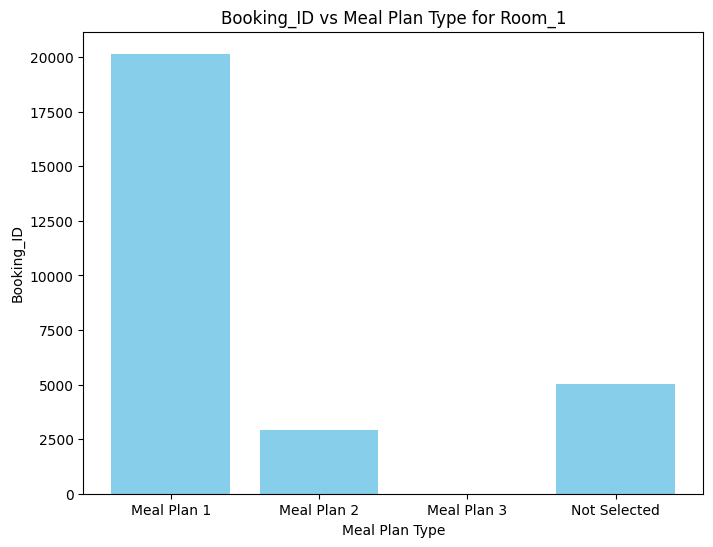

In [163]:
# Group by meal plan type and calculate the average price per room
import matplotlib.pyplot as plt

df_room_1 = df[df['room_type_reserved'] == 'Room_Type 1']

df_avg_price = df_room_1.groupby('type_of_meal_plan')['Booking_ID'].nunique().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(df_avg_price['type_of_meal_plan'], df_avg_price['Booking_ID'], color='skyblue')

plt.title('Booking_ID vs Meal Plan Type for Room_1')
plt.xlabel('Meal Plan Type')
plt.ylabel('Booking_ID')

# Show the plot
plt.show()


In [164]:
room_1_data = df[df['room_type_reserved'] == 'Room 1']

room_1_data.groupby('booking_status').size().reset_index(name='count')

,booking_status,count


In [165]:
print(df['booking_status'].unique())
print(df['room_type_reserved'].unique())

['Not_Canceled' 'Canceled']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']


In [166]:
room_1_data = df[df['room_type_reserved'] == 'Room_Type 1']

print(room_1_data['booking_status'].value_counts())

booking_status
Not_Canceled    19058
Canceled         9072
Name: count, dtype: int64


In [167]:
room_1_status = room_1_data.groupby('booking_status').size().reset_index(name='count')

print(room_1_status)

  booking_status  count
0       Canceled   9072
1   Not_Canceled  19058


In [168]:
import plotly.express as px


room_month_status = room_1_data.groupby(['arrival_month', 'booking_status']).size().reset_index(name='count')

fig = px.line(room_month_status, 
              x='arrival_month', 
              y='count', 
              color='booking_status', 
              title='Cancelled vs Not Cancelled Bookings for Room_Type 1 Over Different Months',
              labels={'arrival_month': 'Month', 'count': 'Booking Count'},
              markers=True)

fig.show()

In [169]:
import plotly.express as px

room_1_data = df[df['room_type_reserved'] == 'Room_Type 1']

room_1_month_status = room_1_data.groupby(['arrival_month', 'booking_status']).size().reset_index(name='count')

fig = px.line(room_1_month_status, 
              x='arrival_month', 
              y='count', 
              color='booking_status', 
              title='Cancelled vs Not Cancelled Bookings for Room_Type 1 Over Different Months',
              labels={'arrival_month': 'Month', 'count': 'Booking Count'},
              markers=True)

fig.show()





In [170]:
room_1_status = room_1_data.groupby('booking_status').size().reset_index(name='count')

print(room_1_status)

fig = px.bar(room_1_status, 
             x='booking_status', 
             y='count', 
             color='booking_status',
             barmode='group')
fig.show()

  booking_status  count
0       Canceled   9072
1   Not_Canceled  19058


In [171]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Total_Days'],
      dtype='object')

In [172]:
import plotly.express as px
df['total_people'] = df['no_of_children'] + df['no_of_adults']
fig = px.sunburst(df, 
                  path=['room_type_reserved', 'type_of_meal_plan', 'total_people'], 
                  title='Bookings by Room Type, Meal Plan, and Special Requests')

fig.show()



In [173]:
import plotly.express as px

adult_child = df.groupby(['no_of_adults', 'no_of_children']).size().reset_index(name='count')

fig = px.bar(adult_child, 
             x='no_of_adults', 
             y='count', 
             color='no_of_children', 
             title='Number of Adults and Children in all Rooms',
             labels={'no_of_adults': 'Number of Adults', 'count': 'Number of Bookings', 'no_of_children': 'Number of Children'},
             barmode='stack') 

fig.show()


Text(0.5, 1.0, 'Number of Adults and Children in Room 1')

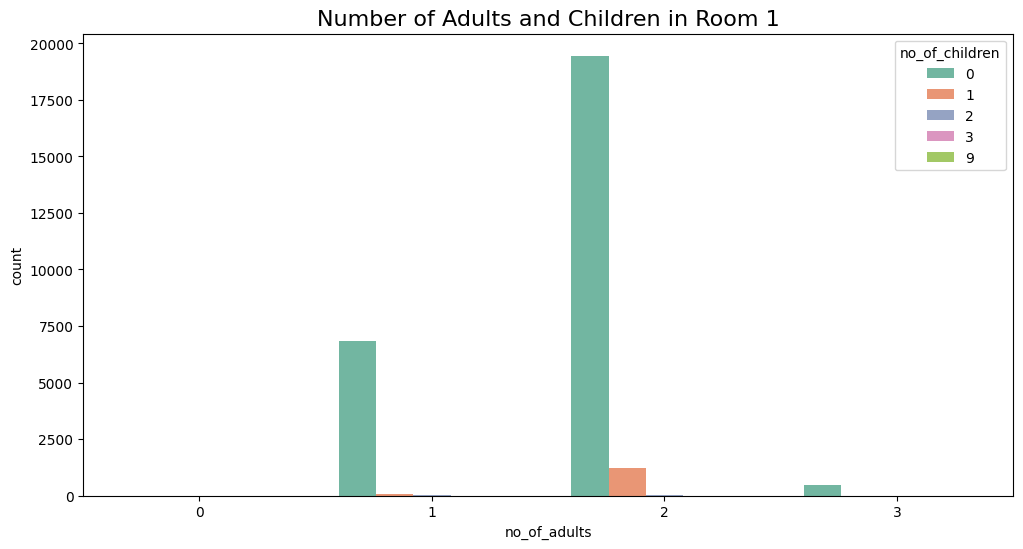

In [174]:
adult_child_counts = df_room_1.groupby(['no_of_adults', 'no_of_children']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=adult_child_counts, x='no_of_adults', y='count', hue='no_of_children', palette='Set2')

plt.title('Number of Adults and Children in Room 1', fontsize=16)

   repeated_guest  avg_price_per_room
0               0          104.419030
1               1           65.589516


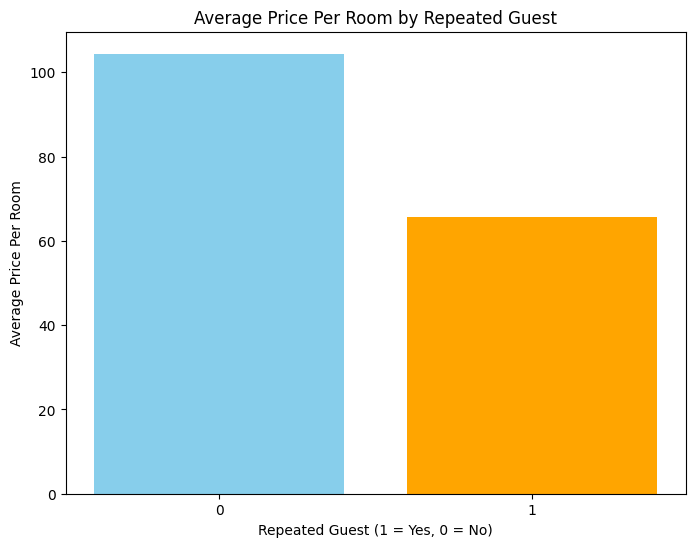

In [ ]:
import matplotlib.pyplot as plt

avg_price_by_guest_type = df.groupby('repeated_guest')['avg_price_per_room'].mean().reset_index()

print(avg_price_by_guest_type)

plt.figure(figsize=(8, 6))
plt.bar(avg_price_by_guest_type['repeated_guest'].astype(str), avg_price_by_guest_type['avg_price_per_room'], color=['skyblue', 'orange'])

plt.title('Average Price Per Room by Repeated Guest')
plt.xlabel('Repeated Guest (1 = Yes, 0 = No)')
plt.ylabel('Average Price Per Room')

plt.show()



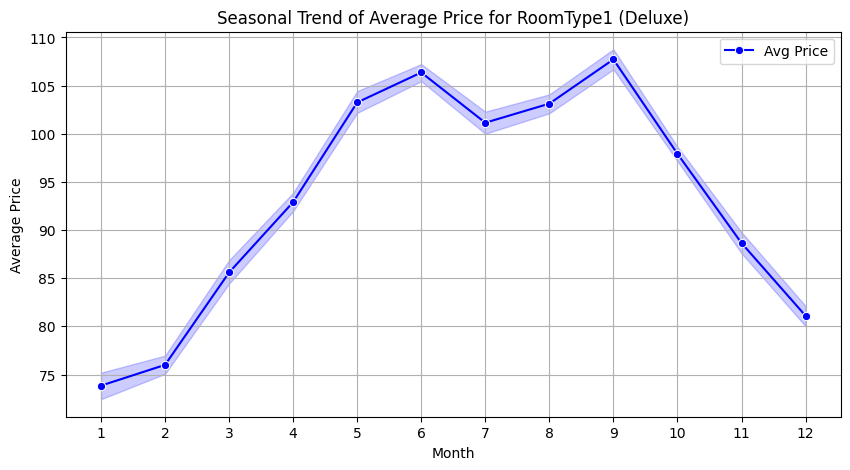

In [176]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_room_1['arrival_month'], y=df_room_1['avg_price_per_room'], marker='o', color='b', label='Avg Price')

plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Seasonal Trend of Average Price for RoomType1 (Deluxe)")
plt.legend()
plt.grid(True)
plt.show()

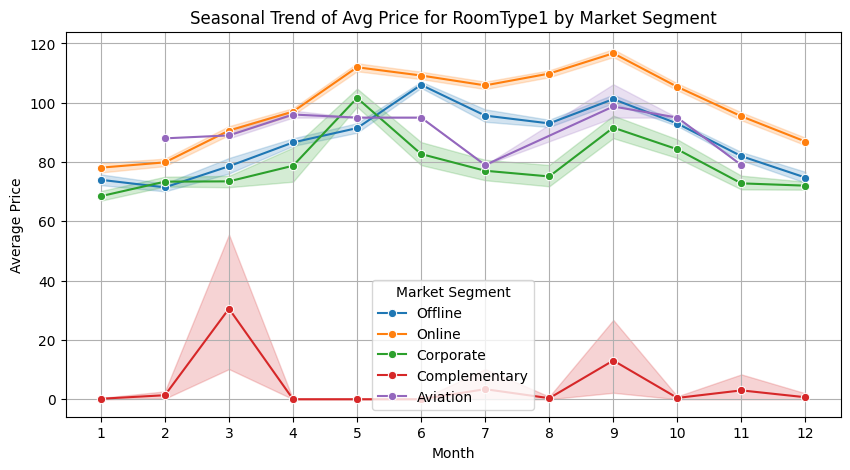

In [177]:
plt.figure(figsize=(10, 5))
df_room_1 = df[df['room_type_reserved'] == 'Room_Type 1']

sns.lineplot(x=df_room_1['arrival_month'], y=df_room_1['avg_price_per_room'], hue=df_room_1['market_segment_type'], marker='o')


plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Seasonal Trend of Avg Price for RoomType1 by Market Segment")
plt.legend(title="Market Segment")
plt.grid(True)

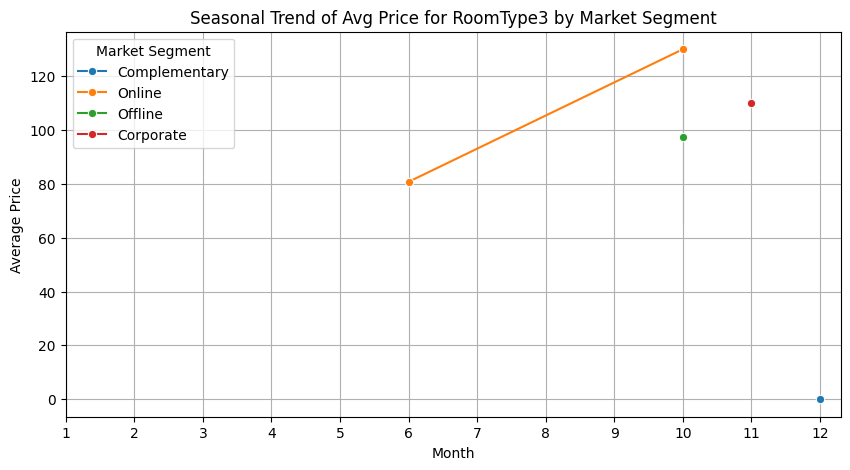

In [178]:
plt.figure(figsize=(10, 5))
df_room_3 = df[df['room_type_reserved'] == 'Room_Type 3']

sns.lineplot(x=df_room_3['arrival_month'], y=df_room_3['avg_price_per_room'], hue=df_room_3['market_segment_type'], marker='o')


plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Seasonal Trend of Avg Price for RoomType3 by Market Segment")
plt.legend(title="Market Segment")
plt.grid(True)

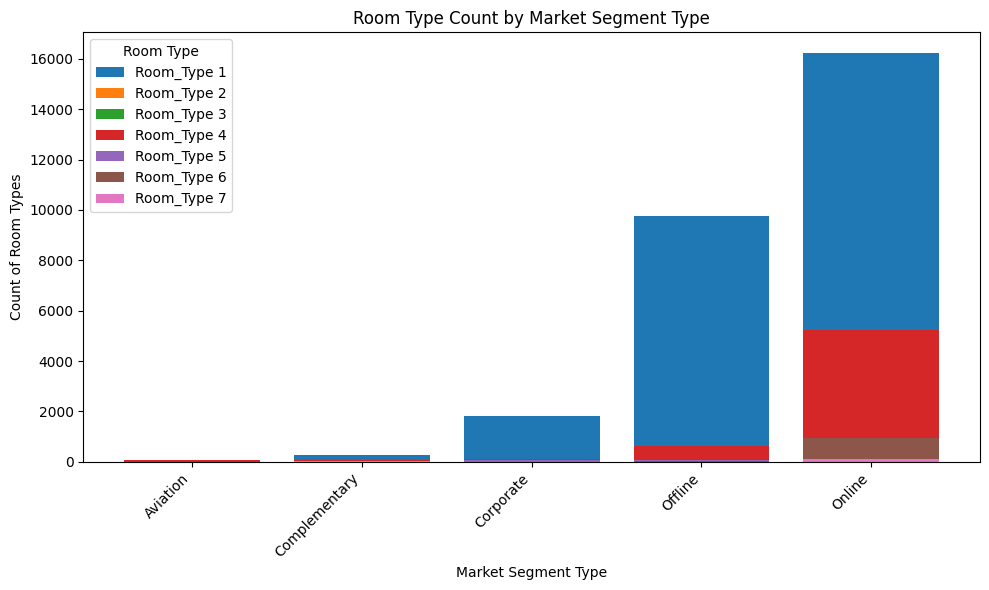

In [179]:
import matplotlib.pyplot as plt

room_segment_counts = df.groupby(['room_type_reserved', 'market_segment_type']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
for room_type in room_segment_counts['room_type_reserved'].unique():
    subset = room_segment_counts[room_segment_counts['room_type_reserved'] == room_type]
    plt.bar(subset['market_segment_type'], subset['count'], label=room_type)

plt.title('Room Type Count by Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Count of Room Types')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Room Type')

plt.tight_layout()
plt.show()


In [180]:

room_segment_counts = pd.crosstab(df['room_type_reserved'], df['market_segment_type'], margins=True, margins_name="Total")
print(room_segment_counts)


market_segment_type  Aviation  Complementary  Corporate  Offline  Online  \
room_type_reserved                                                         
Room_Type 1                60            247       1833     9747   16243   
Room_Type 2                 0             20          2       57     613   
Room_Type 3                 0              2          1        2       2   
Room_Type 4                65             52         99      613    5228   
Room_Type 5                 0             17         74       81      93   
Room_Type 6                 0             14          3       23     926   
Room_Type 7                 0             39          5        5     109   
Total                     125            391       2017    10528   23214   

market_segment_type  Total  
room_type_reserved          
Room_Type 1          28130  
Room_Type 2            692  
Room_Type 3              7  
Room_Type 4           6057  
Room_Type 5            265  
Room_Type 6            966  
Room_Ty

no_of_previous_bookings_not_canceled     0   1   2   3   4   5   6   10  16  \
no_of_previous_cancellations                                                  
0                                     23118  30   6   1   2   1   1   0   0   
1                                        29   0   0   0   0   0   0   0   0   
3                                         0   1   0   0   0   0   0   0   0   
11                                        3   1   0   0   7   5   0   2   1   

no_of_previous_bookings_not_canceled  19  20  21  22  
no_of_previous_cancellations                          
0                                      0   0   0   0  
1                                      0   0   0   0  
3                                      0   0   0   0  
11                                     1   1   1   3  


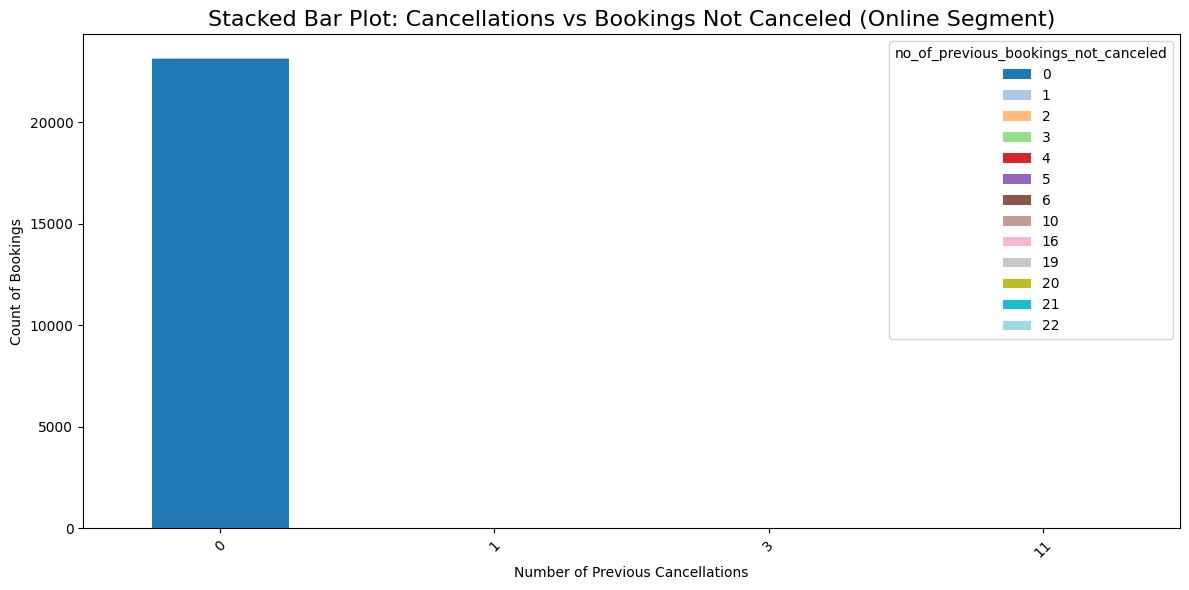

In [181]:
import seaborn as sns
online_data = df[df['market_segment_type'] == 'Online']

pivot_df = online_data.groupby(['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']).size().unstack(fill_value=0)

print(pivot_df)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Stacked Bar Plot: Cancellations vs Bookings Not Canceled (Online Segment)', fontsize=16)
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Count of Bookings')
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


                                      no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.019787   
no_of_children                           -0.019787        1.000000   
no_of_weekend_nights                      0.103316        0.029478   
no_of_week_nights                         0.105622        0.024398   
required_car_parking_space                0.011429        0.034244   
lead_time                                 0.097287       -0.047091   
arrival_year                              0.076719        0.045983   
arrival_month                             0.021841       -0.003076   
arrival_date                              0.026338        0.025482   
repeated_guest                           -0.192277       -0.036348   
no_of_previous_cancellations             -0.047426       -0.016390   
no_of_previous_bookings_not_canceled     -0.119166       -0.021189   
avg_price_per_room                        0.296886        0.337728   
no_of_special_reques

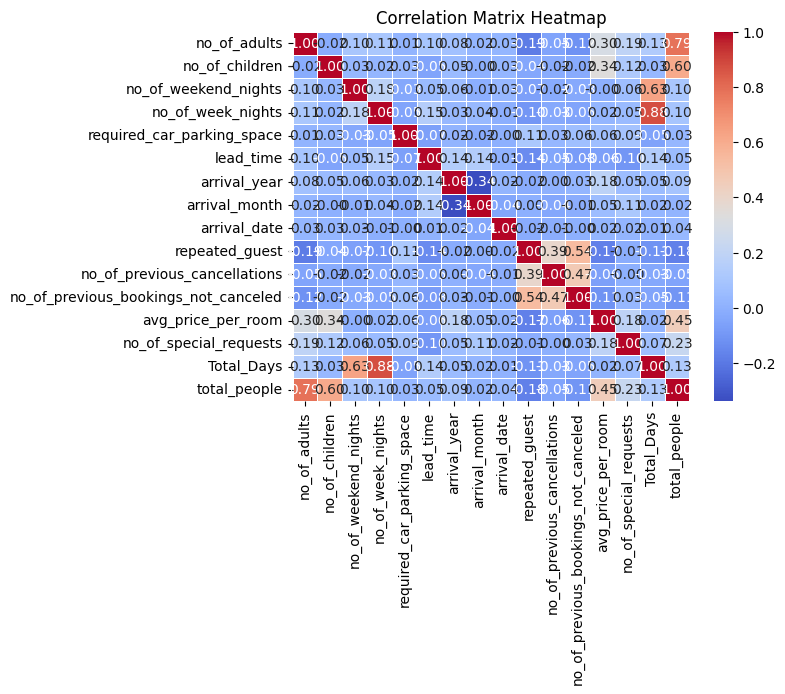

In [182]:
import plotly.graph_objects as go
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [183]:
df['no_of_previous_bookings_not_canceled'].nunique()

59

In [184]:
df['no_of_previous_cancellations'].describe()

count    36275.000000
mean         0.023349
std          0.368331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: no_of_previous_cancellations, dtype: float64

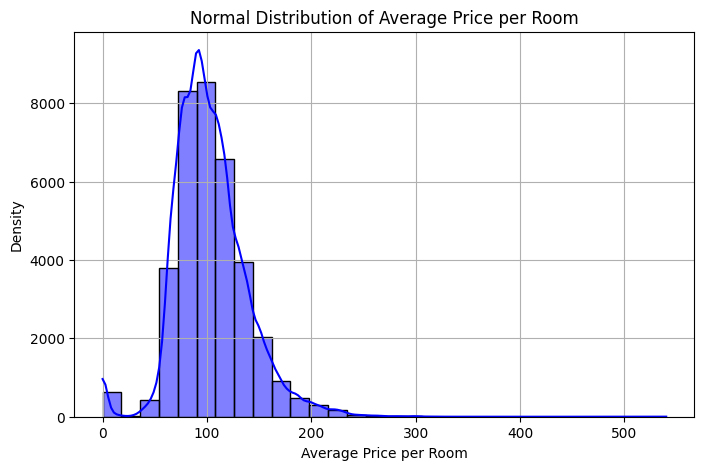

In [185]:
plt.figure(figsize=(8, 5))
sns.histplot(df['avg_price_per_room'], kde=True, bins=30, color="blue")


plt.xlabel("Average Price per Room")
plt.ylabel("Density")
plt.title("Normal Distribution of Average Price per Room")
plt.grid(True)

plt.show()